<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Confidence Intervals for Statistical Measurements


---

## Learning Objectives
### Core
- Understand the relationship between the mean, the standard deviation, and the standard error of the mean
- Calculate the standard error of the mean based on example data
- Understand the relationship between the CLT and the standard error of the mean
- Understand the concept of a confidence interval

### Target
- Calculate the confidence interval for a given dataset
- Understand how the confidence interval of a specified confidence level is calculated from the mean, the standard error and the standard normal distribution

### Stretch
- Understand how the confidence interval expression generalizes to small sample size for a normally distributed population 
- Interpret the meaning of the confidence interval and understand potential pitfalls of describing frequentist statistical measures


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li><li><span><a href="#Review-and-Introduction:-Statistics-Surrounding-the-Ages-of-Single-People" data-toc-modified-id="Review-and-Introduction:-Statistics-Surrounding-the-Ages-of-Single-People-1.4">Review and Introduction: Statistics Surrounding the Ages of Single People</a></span><ul class="toc-item"><li><span><a href="#Calculate-the-mean-and-the-standard-deviation-of-the-data.-What-do-these-statistics-tell-us-specifically?" data-toc-modified-id="Calculate-the-mean-and-the-standard-deviation-of-the-data.-What-do-these-statistics-tell-us-specifically?-1.4.1">Calculate the mean and the standard deviation of the data. What do these statistics tell us specifically?</a></span></li></ul></li><li><span><a href="#The-Standard-Error-of-a-Statistic" data-toc-modified-id="The-Standard-Error-of-a-Statistic-1.5">The Standard Error of a Statistic</a></span></li><li><span><a href="#The-CLT-and-Uncertainty-of-the-Sample-Mean" data-toc-modified-id="The-CLT-and-Uncertainty-of-the-Sample-Mean-1.6">The CLT and Uncertainty of the Sample Mean</a></span></li><li><span><a href="#Confidence-intervals" data-toc-modified-id="Confidence-intervals-1.7">Confidence intervals</a></span><ul class="toc-item"><li><span><a href="#The-plot-below-shows-these-z-score-bounds-on-the-$Z-\sim-N(0,-1)$-distribution:" data-toc-modified-id="The-plot-below-shows-these-z-score-bounds-on-the-$Z-\sim-N(0,-1)$-distribution:-1.7.1">The plot below shows these z-score bounds on the $Z \sim N(0, 1)$ distribution:</a></span></li><li><span><a href="#Comparison-of-standard-normal-distribution-and-t-distribution" data-toc-modified-id="Comparison-of-standard-normal-distribution-and-t-distribution-1.7.2">Comparison of standard normal distribution and t-distribution</a></span></li></ul></li><li><span><a href="#Interpreting-the-Confidence-Interval" data-toc-modified-id="Interpreting-the-Confidence-Interval-1.8">Interpreting the Confidence Interval</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='review-statistics-parameters'></a>

### Review and Introduction: Statistics Surrounding the Ages of Single People

---

Below is a random sample of data about age taken from a survey conducted by a bank. The data is specifically subset to people who have classified themselves as "single" as opposed to "married." 

We are interested in describing our sample using **descriptive statistics**. We are also interested in making statements about the overall population that the sample was drawn from (i.e., all single people who would conceivably take the bank survey) using **inferential statistics**.

In [2]:
single = np.array([24, 26, 35, 32, 38, 35, 31, 43, 40, 42, 39, 48, 37, 27, 33, 33, 34,
                   37, 33, 26, 30, 30, 30, 31, 33, 35, 43, 30, 35, 26, 23, 27, 54, 35,
                   29, 28, 37, 33, 34, 32, 29, 43, 29, 36, 36, 34, 39, 33, 30, 32, 23,
                   30, 31, 38, 35, 22, 59, 20, 45, 33, 35, 33, 23, 58, 33, 30, 38, 28,
                   50, 31, 38, 42, 41, 33, 29, 29, 31, 30, 28, 27, 29, 38, 36, 56, 36,
                   31, 30, 29, 25, 41, 47, 34, 38, 50, 23, 28, 35, 32, 36, 28, 39, 33,
                   25, 36, 27, 30, 29, 42, 43, 20, 26, 53, 41, 27, 31, 33, 38, 37, 31,
                   28, 25, 47, 38, 41, 26, 26, 25, 32, 32, 23, 31, 51, 49, 32, 48, 44,
                   30, 31, 34, 37, 31, 32, 24, 38, 38, 39, 29, 25, 29, 31, 24, 35, 28,
                   24, 24, 35, 36, 21, 56, 54, 28, 32, 27, 30, 31, 31, 27, 32, 30, 29,
                   27, 26, 36, 27, 32, 32, 38, 41, 33, 33, 26, 29, 27, 42, 35, 32, 35,
                   43, 32, 22, 32, 37, 30, 39, 28, 33, 25, 34, 39, 31])

Plotting a histogram can provide an effective visual description of the data before we even calculate any statistical measures.

**The following code plots the histogram for the distribution of ages using `matplotlib` and `seaborn`.**

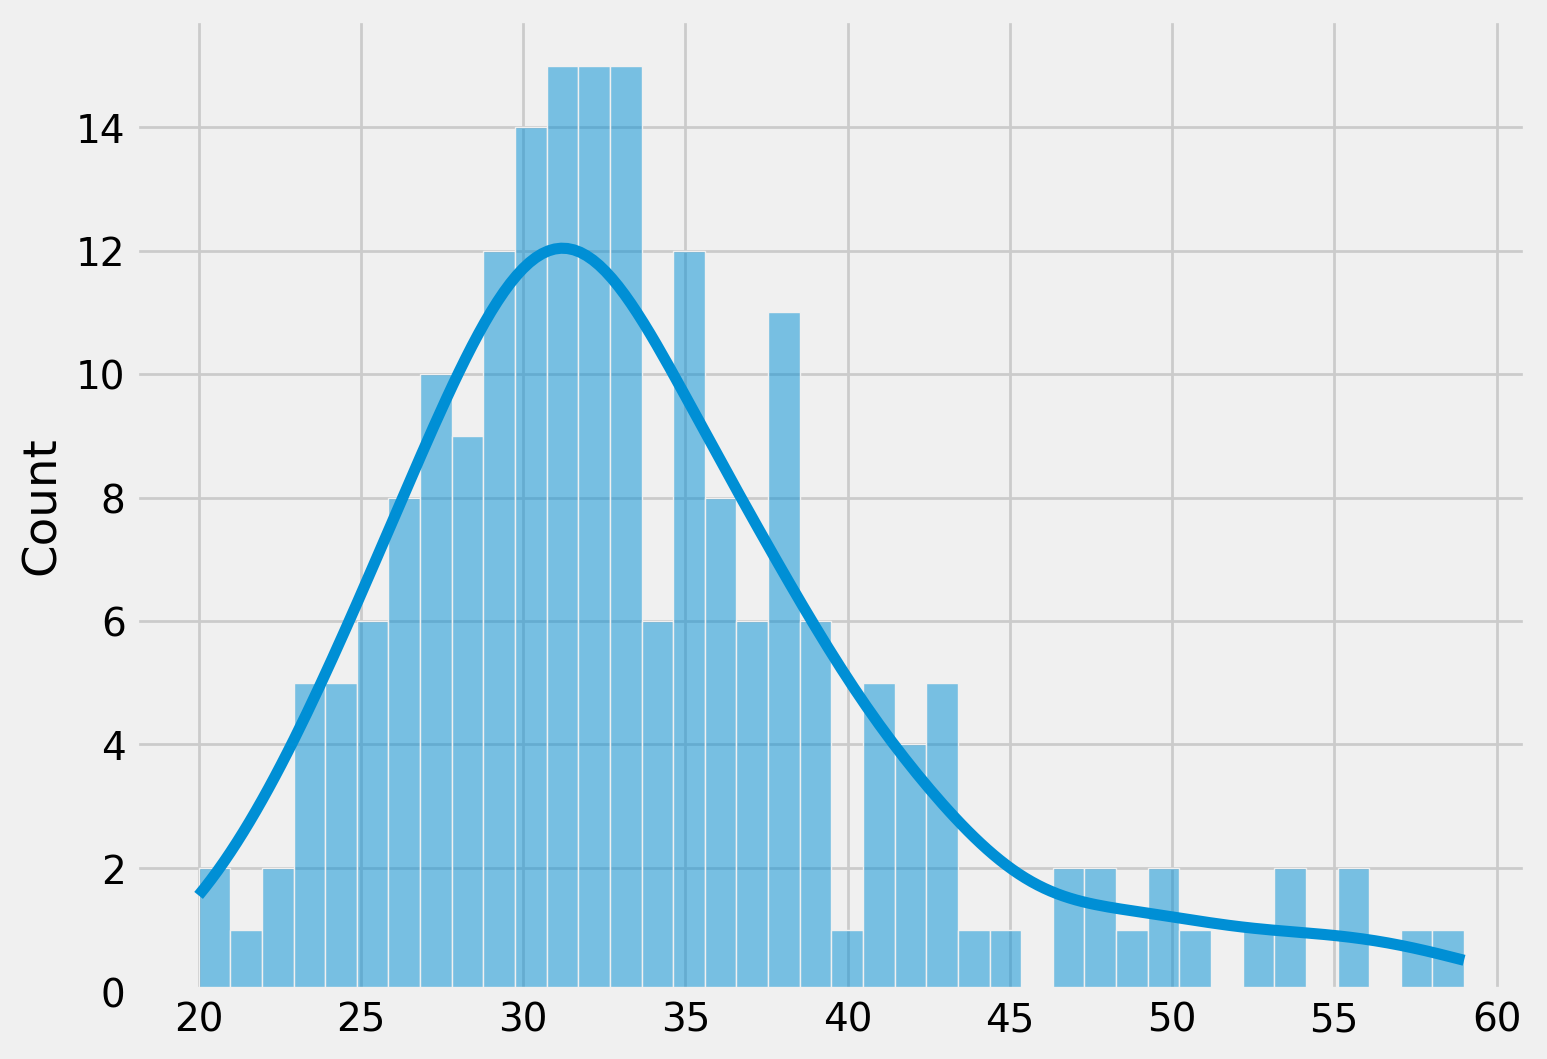

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(single, bins=40, kde=True)
plt.show()

What might you say about the distribution of the data?

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


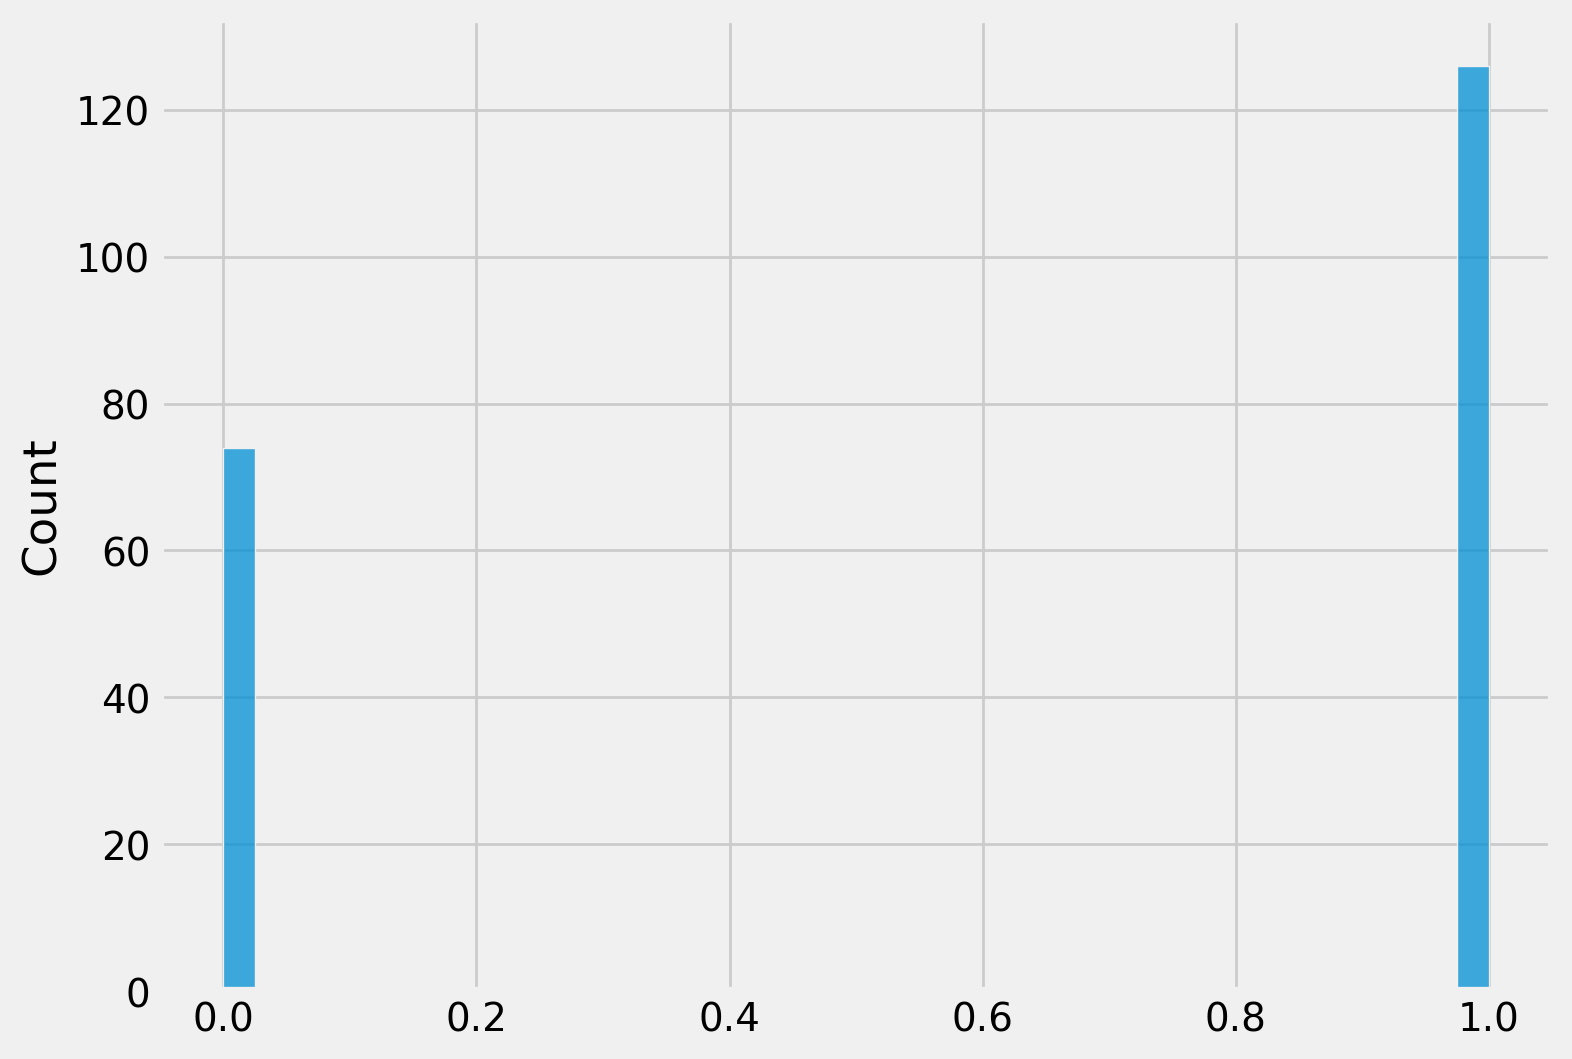

In [4]:
# Don't plot distributions of discrete variables with kde=True!
fig, ax = plt.subplots(figsize=(8,6))

# plot the count of those who are aged 30 and below and those over 30
sns.histplot(single>30, bins=40, kde=False)
plt.show()

We can try to use a log transformation to reduce the skewness.

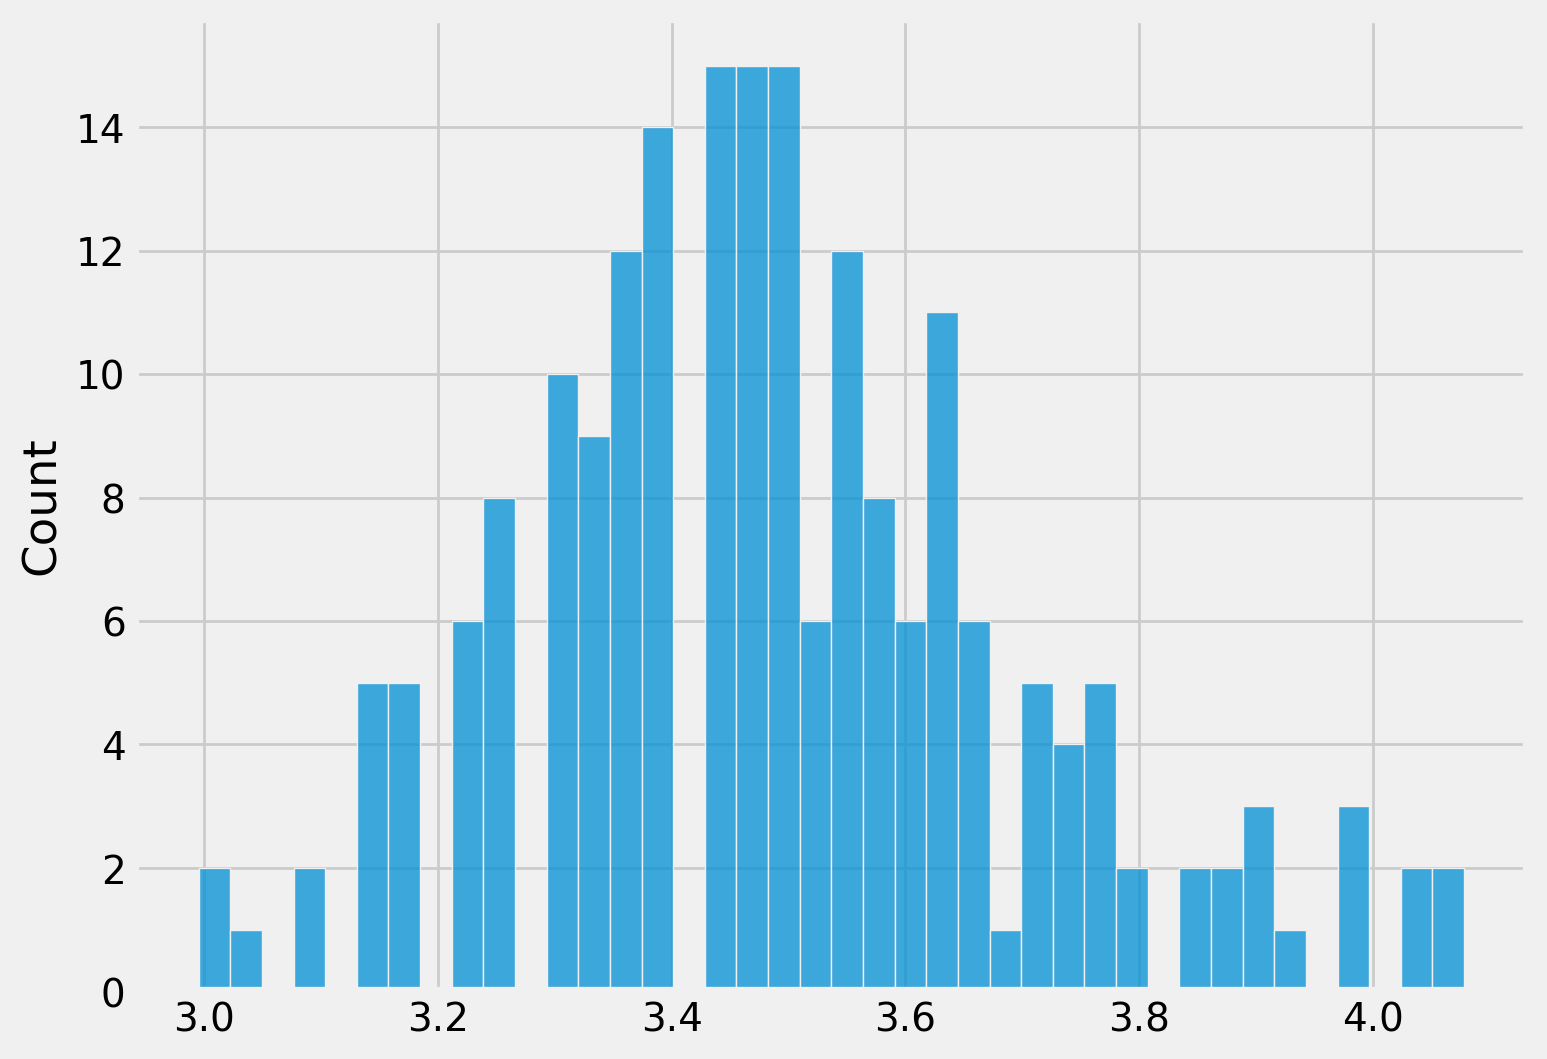

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(np.log(single), bins=40, kde=False)
plt.show()

#### Calculate the mean and the standard deviation of the data. What do these statistics tell us specifically?

In [6]:
print(np.mean(single))
print(np.std(single))

33.555
7.461030424813988


_This tells us that the mean age of our sample is 33.55 years._   
_The standard deviation, which is a measure of the average spread in the
observed age data compared to the mean age, is 7.46 years._ 

### The Standard Error of a Statistic
---
<a id='standard-error'></a>


If our goal extends beyond simply describing the data we have, and we instead want to infer something about the overall population based on the information in this sample, we will inherently have some degree of uncertainty.

In this regard we will consider the overall population to follow a probability distribution with particular shape parameters which we could measure by observing the whole population. Usually we will however have only access to samples from the overall population. The data in these samples has some variability which will allow us to infer the true distribution parameters only to a limited certainty. Considering these parameters as fixed is known as the _frequentist approach_.

**Uncertainty About the True Value**

Working within the frequentist framework, we know that there is a true value for the mean age of all single people. If we had surveyed every single one of these people and calculated the mean, then we would have that value. However, we have only measured 200 people's ages at random. Depending on our sample size, we will have some degree of uncertainty about how far off our statistic of our random sample is from the true parameter. This distance is our measurement "error."

**The Mean, vs. The Standard Deviation, vs. The Standard Error**

It is important to frame these definitions in the context of *repeated measurements*. Furthermore, as frequentists, we conceive of this sample as one of many hypothetical random samples from the same overall population. Let's start with our calculated statistic, the mean age.

> **Mean:** Our sample mean age is the estimate of the true mean age of the overall population.

We also calculated the standard deviation of ages in our sample.

> **Standard deviation:** This quantifies the spread of our data — i.e., the square root of the average quadratic distance of an observation from the mean. If we were to repeat a measurement, it would quantify our certainty about how far that age will be from the mean age.

Lastly, we have the standard error of our mean. Whereas the standard deviation is a measure of the spread of our data, the standard error is a measure of spread in our calculated statistic. In other words, the standard error is the standard deviation of our statistic.

> **Standard error:** If you had a new random sample of ages that was the same size as the original, the standard error would quantify our certainty about how far the new sample mean would be from the original sample mean.

The calculation for the standard error of the sample mean is:

$$ SE_{\bar{x}} = \frac{s_{x}}{\sqrt{n}} $$

Here, $s_{x}$ is the sample standard deviation and $n$ is the sample size.

**Now, let's manually calculate the standard error of the sample mean for our ages.**

In [7]:
std = np.std(single)
n = len(single)
sem = std/np.sqrt(n)
print('SEM:', sem)

SEM: 0.5275745208025118


<a id='clt-uncertainty'></a>

### The CLT and Uncertainty of the Sample Mean

---

Recall that the central limit theorem dictates that the distribution of sample means (calculated across different random samples from our overall population) will be normally distributed. 

Using the CLT, we are able to state that:

> Our sample mean (33.55) falls somewhere on the normal distribution of all sample means calculated from random samples drawn from the overall population of ages.

We also know from the CLT that the standard deviation of this normal distribution sets parameters to be $\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the standard deviation of the population. 

Looks familiar? Replacing $\sigma$ with our estimate of the standard deviation ($s$), we set parameters for the standard deviation of the distribution using our measure of the standard error of the mean, $\frac{s}{\sqrt{n}}$.

Then, we use our sample mean $—$ our **point estimate** $—$ as the best estimate of the population mean. Set parameters for the distribution of sample means as

$$ \bar{X} \sim N(\bar{x}, \frac{s_{x}}{\sqrt{n}} )$$



What this equation is saying is **$\bar{X}$** is normally distributed ( $N$ ) with a mean of $\bar{x}$ and standard deviation of $\frac{s_{x}}{\sqrt{n}}$ .

In this equation, **$\bar{X}$** is a random variable from the _sample space_ (a.k.a., $\Omega$).  The sample space is the set containing all possible values of $\bar{x}$ (_our_ sample mean).  Thus we are saying that any and all of our possible sample means will follow the normal distribution defined above.

**The code below visualizes this distribution with `matplotlib` and `scipy`.**

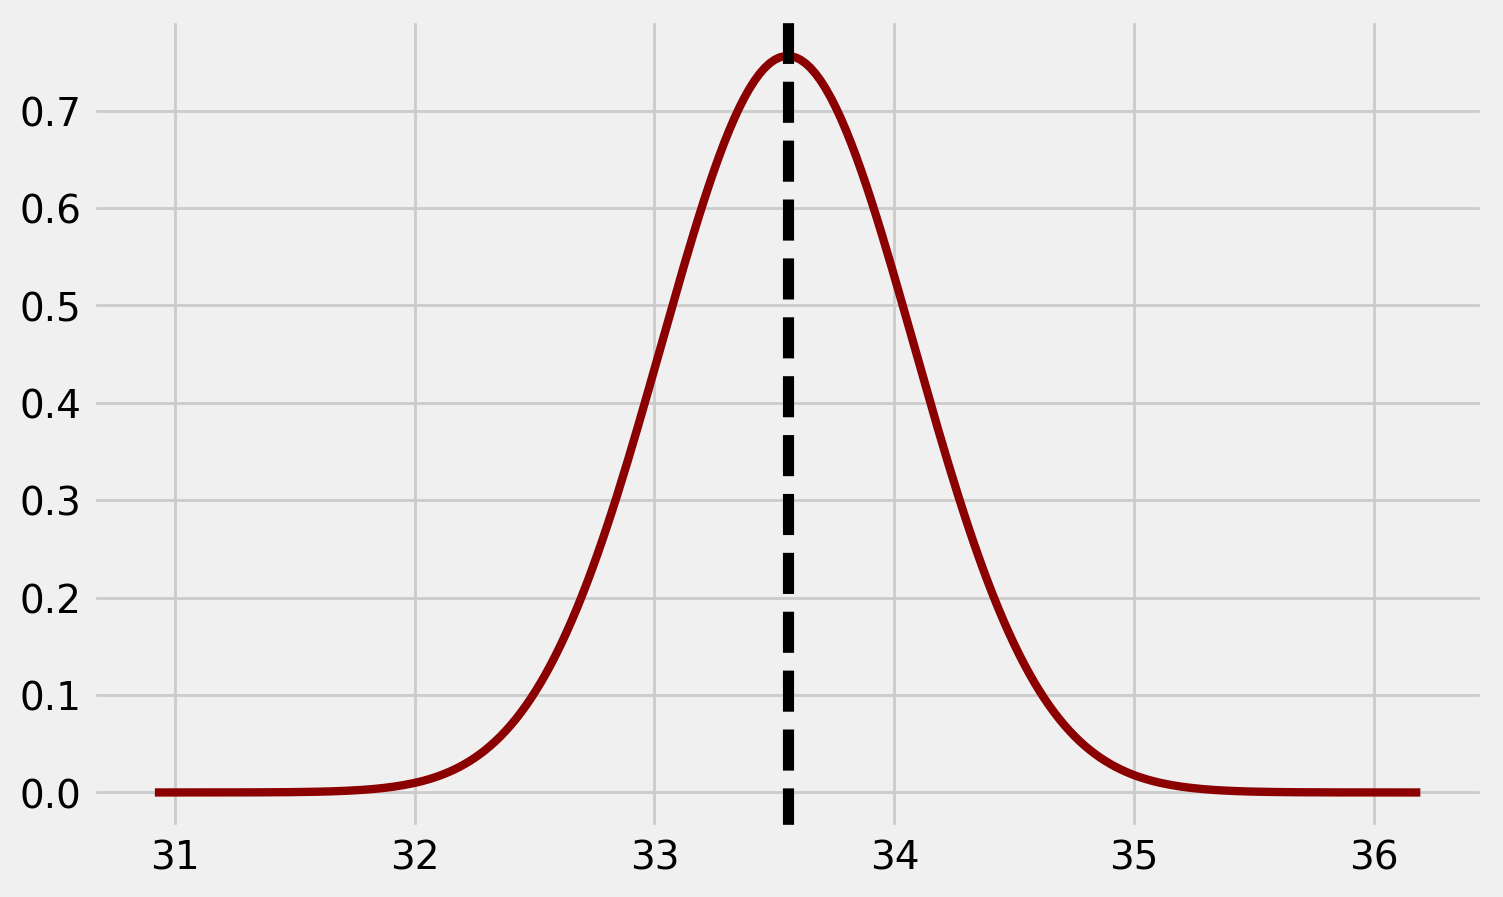

In [8]:
single_mean = np.mean(single)
single_sem = np.std(single)/np.sqrt(len(single))

# Generate points on the x axis:
xpoints = np.linspace(single_mean - single_sem*5, single_mean + single_sem*5, 250)

# Use stats.norm.pdf to get values on the probability density function for the normal distribution:
ypoints = stats.norm.pdf(xpoints, single_mean, single_sem)

# Initialize a matplotlib "figure:"
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure:
ax = fig.gca()

# Plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(single_mean, linewidth=4, ls='dashed', c='black')
plt.show()

<a id='confidence-intervals'></a>

### Confidence intervals

---

A confidence interval describes a set of possible values for the parameter based on a statistic. Confidence intervals will be centered at the point estimate and typically include +/- a few standard errors.

Because the mean statistic is normally distributed, according to the CLT, our confidence interval for the sample mean will be:

$$ \text{CI} = \text{point estimate} \pm \text{multiplier} \cdot \text{standard error} $$

$$\text{CI} = \bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$

$z_{\alpha/2}$ is the z-score on the unit **$Z \sim N(0, 1)$** distribution that specifies the *degree* of certainty we want. For now, you can ignore the $\alpha/2$ part; this relates to the concept of Type I error, which we will cover later. What is important now is that, the larger the z-score, the greater the area under the normal distribution of sample means covered by the confidence interval.

**If we want our confidence level $—$ i.e., how confident we are that the true value of the parameter lies within the confidence interval $—$ to be:**
- **90%**: The z-score multiplier should be **z = 1.645**, because 90% of the area under the $Z \sim N(0, 1)$ normal distribution lies between -1.645 and 1.645.
- **95%**: The z-score multiplier should be **z = 1.960**, because 95% of the area under the $Z \sim N(0, 1)$ normal distribution lies between -1.960 and 1.960.
- **99%**: The z-score multiplier should be **z = 2.576**, because 99% of the area under the $Z \sim N(0, 1)$ normal distribution lies between -2.576 and 2.576.



Theses values can be calculated with the percent point function `ppf`. This function takes the percentile and returns the corresponding value on the x-axis.

In [9]:
# P(lower<x<upper) = 0.68
# P(x<lower) = (1-0.68)/2 = 0.1599
# P(x>Upper) =  0.1599
print((stats.norm().ppf([0.16,0.84])))

[-0.99445788  0.99445788]


In [10]:
print('90 %: ',np.mean(single)+(stats.norm().ppf([0.05,0.95])))
print('95 %: ',np.mean(single)+(stats.norm().ppf([0.025,0.975])))
print('99 %: ',np.mean(single)+(stats.norm().ppf([0.005,0.995])))

90 %:  [31.91014637 35.19985363]
95 %:  [31.59503602 35.51496398]
99 %:  [30.9791707 36.1308293]


> **Note:** For a small number of samples (e.g. less than 30) instead of the z-score one has to use the t-statistic and the formula becomes 

> $$\text{CI} = \bar{x} \pm t_{\alpha/2,n-1} \cdot \frac{s}{\sqrt{n}}$$

> where $n-1$ is often referred to as  the numbers of degrees of freedom of the t-distribution.
Using the t-statistic assumes that the sample for which the mean is calculated stems from a normal distribution. For large enough sample size, the mean is normally distributed due to the central limit theorem, and the population itself does not have to be normally distributed to use this formula.

#### The plot below shows these z-score bounds on the $Z \sim N(0, 1)$ distribution:

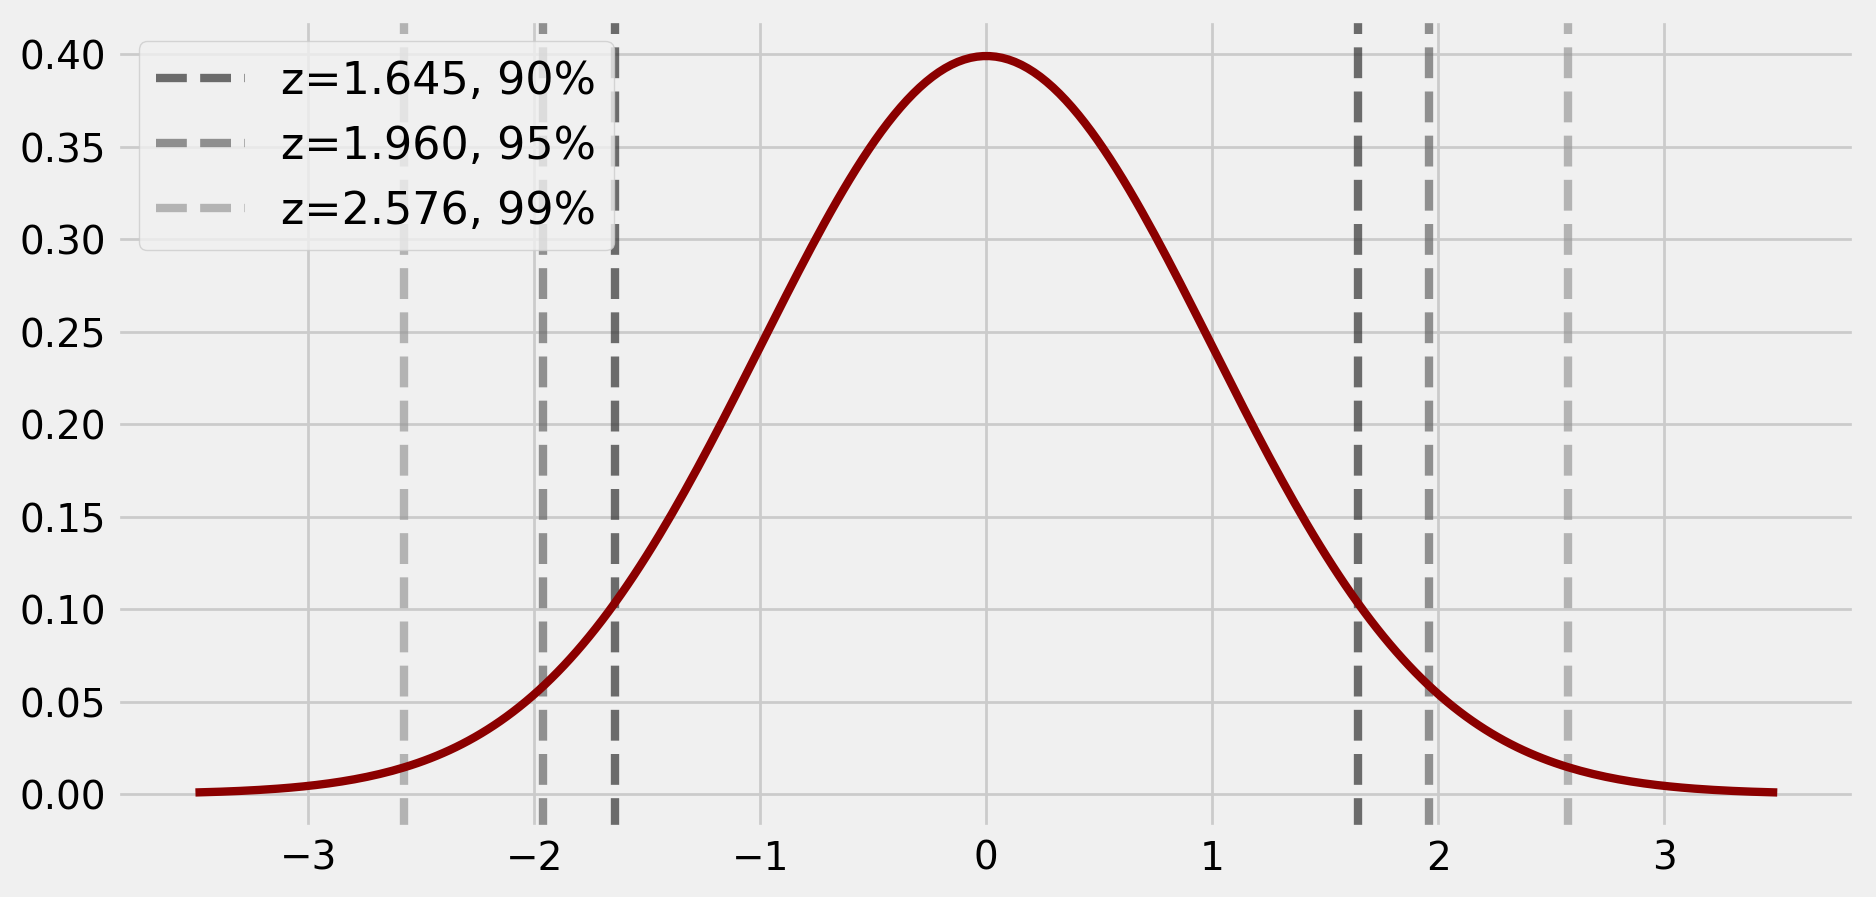

In [11]:
# Initialize a matplotlib "figure:"
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

zx = np.linspace(-3.5, 3.5, 250)

Z = stats.norm(0, 1)
zy = Z.pdf(zx)

# 90%:
ax.axvline(stats.norm().ppf(0.05), ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(stats.norm().ppf(0.95), ls='dashed', lw=3, color='#333333', alpha=0.7, label='z=1.645, 90%')

# 95%:
ax.axvline(stats.norm().ppf(0.025), ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(stats.norm().ppf(0.975), ls='dashed', lw=3, color='#666666', alpha=0.7, label='z=1.960, 95%')

# 99%:
ax.axvline(stats.norm().ppf(0.005), ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(stats.norm().ppf(0.995), ls='dashed', lw=3, color='#999999', alpha=0.7, label='z=2.576, 99%')

ax.plot(zx, zy, linewidth=3, color='darkred')
ax.legend(loc='upper left',fontsize=16)
plt.show()

#### Comparison of standard normal distribution and t-distribution

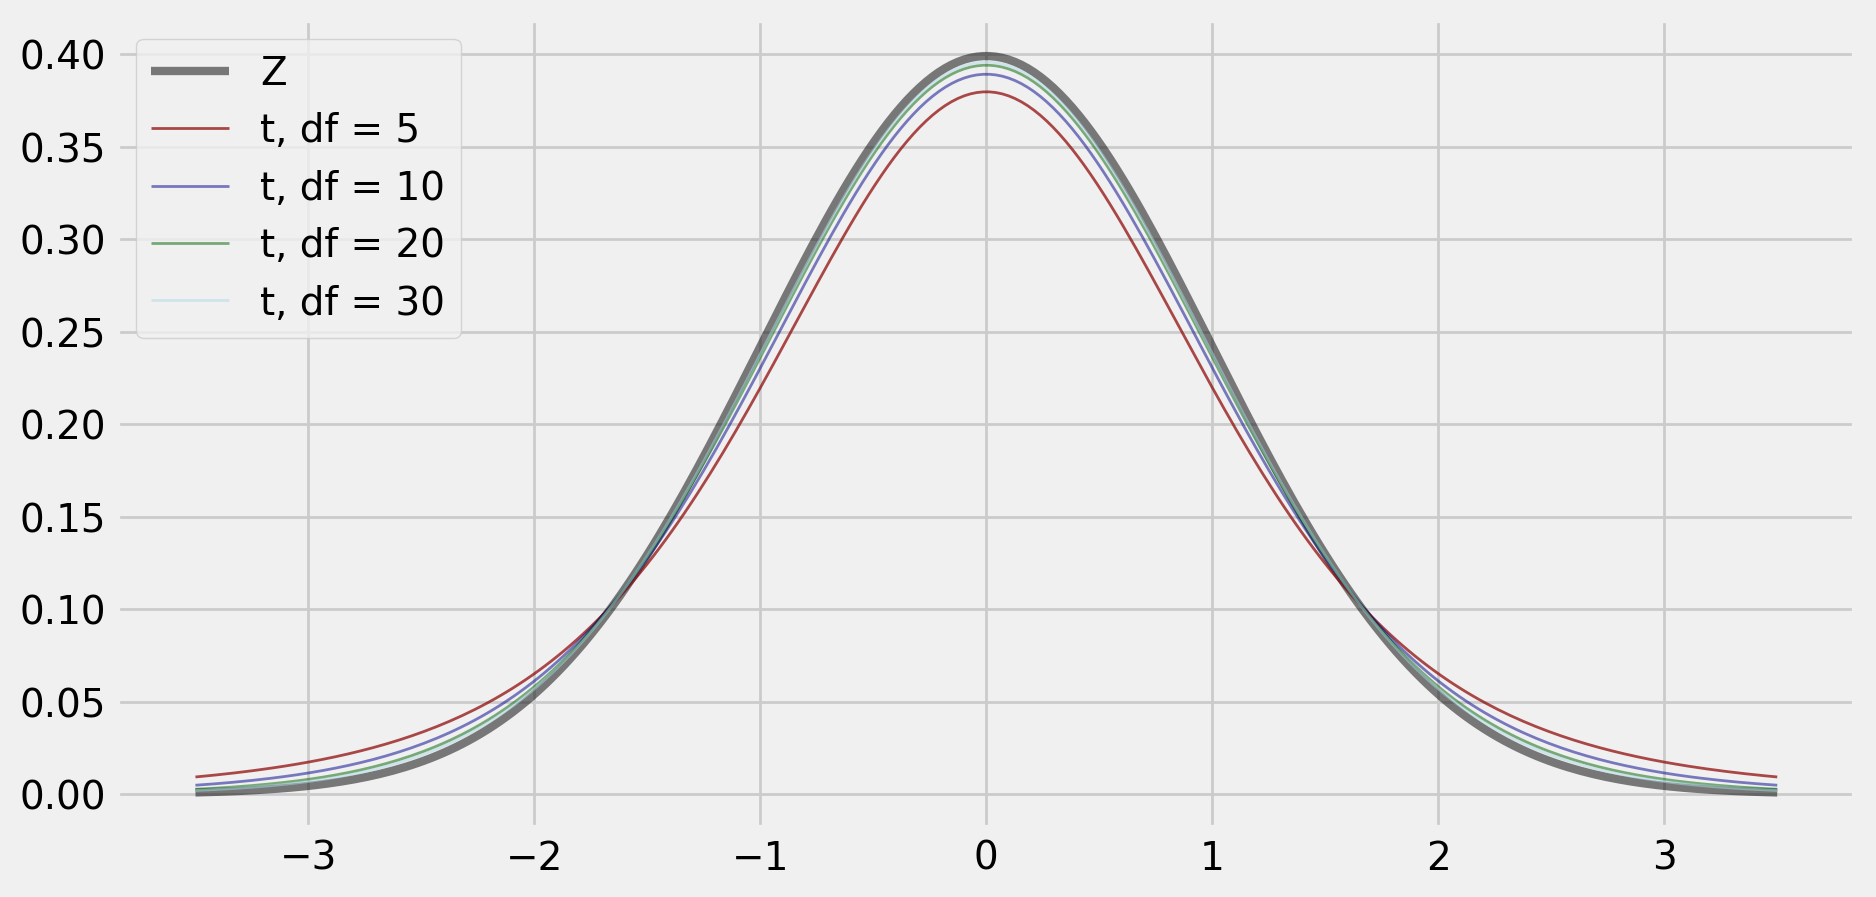

In [12]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

zx = np.linspace(-3.5, 3.5, 250)

Z = stats.norm(0, 1)
zy = Z.pdf(zx)

# The variable in the t-distribution gives the number of degrees of freedom.

t_10 = stats.t(10)
t_10_y = t_10.pdf(zx)
t_20 = stats.t(20)
t_20_y = t_20.pdf(zx)
t_30 = stats.t(30)
t_30_y = t_30.pdf(zx)
t_05 = stats.t(5)
t_05_y = t_05.pdf(zx)

ax.plot(zx, zy, linewidth=3, color='black',label='Z', alpha=0.5)
ax.plot(zx, t_05_y, linewidth=1, color='darkred',label='t, df = 5', alpha=0.7)
ax.plot(zx, t_10_y, linewidth=1, color='darkblue',label='t, df = 10', alpha=0.5)
ax.plot(zx, t_20_y, linewidth=1, color='darkgreen',label='t, df = 20', alpha=0.5)
ax.plot(zx, t_30_y, linewidth=1, color='lightblue',label='t, df = 30', alpha=0.5)
ax.legend(loc='upper left')
plt.show()

<a id='interpreting-ci'></a>

### Interpreting the Confidence Interval

---

Suppose a 95% confidence interval for the mean number of pasta dishes I eat in a week is [2.5, 5.5]. There are two interpretations we can derive from this, and one of them is wrong.


**Interpretation 1 (incorrect):**
> There is a 95% probability that the number of pasta dishes I eat in a week is between 2.5 and 5.5.

**Interpretation 2 (correct):**
 > If we pulled 100 samples and constructed confidence intervals in the same manner, we expect that 95 of the intervals would contain the true mean of number of pasta dishes I eat in a week.




Why is interpretation 1 wrong? It assigns a probability to the true value. In frequentist statistics, the true value is fixed and the data is random. Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

This is a critical difference in frequentist statistics (vs. Bayesian); our data has a probability of occurring, but there is no probability regarding possible values for the true parameter.

[This blog post has a great discussion of the difference between the frequentist confidence interval and the Bayesian credible interval.](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/)

**We can also reframe this statement in terms of the random sampling procedure:**

Typically, you will see confidence intervals expressed as...
> _We are 95% confident that the mean number of pasta dishes I eat each week is between 2.5 and 5.5._

While the above is the common shorthand, we can also think about a supplementary statement...
> _We are also 5% confident that the mean number of pasta dishes I eat each week does not fall in between 2.5 and 5.5. _

**Tip:**  It is the random data and mathematical process that you are measuring when expressing a confidence interval. 

[This post has more examples and information on the correct way to interpret Confidence Intervals](http://www.mathbootcamps.com/interpreting-confidence-intervals/)

## Example:
    
Measuring the IQ of 100 adults, we find that the mean is 125. The population standard deviation if assumed to be 20. What are the 95% confidence intervals for the mean?


In [13]:
# Finding the z-values for the percentiles from 0.025 to 0.975 
# for the 95% confidence interval
# We use the percent point function, ppf
stats.norm.ppf([0.025,0.975])

array([-1.95996398,  1.95996398])

In [14]:
# use the z values to calculate the confidence interval
mean_iq = 125
sd_iq = 20
ci = mean_iq + stats.norm.ppf([0.025, 0.975])*(sd_iq/np.sqrt(100))
print(f'The confidence interval is {ci}')

The confidence interval is [121.08007203 128.91992797]


## Other intervals
Similarly we can obtain the 99% or 90% confidence interval estimates.

In [15]:
ci_level = 0.9
lower_bound = (1 -ci_level)/2
upper_bound = (1 - lower_bound)
ci = mean_iq + stats.norm.ppf([lower_bound, upper_bound])*(sd_iq/np.sqrt(100))
print(lower_bound)
print(upper_bound)
print(f'The confidence interval is {ci}')
print(f'We are {ci_level*100:.0f}% confident that the true mean IQ')
print(f'is between {ci[0]:.2f} and {ci[1]:0.2f}')
      

0.04999999999999999
0.95
The confidence interval is [121.71029275 128.28970725]
We are 90% confident that the true mean IQ
is between 121.71 and 128.29


## Quick Exercise

### Q 1:

Height measurements of 200 individuals resulted in an observed mean of 174 cm. General estimates indicate a standard deviation of 6 cm for heights. What are the 95 % confidence intervals for the measured mean? 

In [22]:
# use the z values to calculate the confidence interval
mean_h = 174
sd_h = 6
ci = mean_h + stats.norm.ppf([0.025,0.975])*(sd_h/np.sqrt(200))
print(f'The confidence interval is {ci}')

The confidence interval is [173.16845771 174.83154229]


### Another Example: small sample size

You have a huge box with tennis balls of which you are not sure if they conform with rules for size (must be between 6.54 and 6.86 cm in diameter). You pick 10 of the balls and measure their diameter, obtaining a mean of 6.58 cm and a sample standard deviation of 0.04 cm. Find 95 % and 99 % confidence intervals. Can you be confident that the balls in the box conform with the rules?

In [17]:
# Since the sample size is small, we need to use the t-distribution.
# To get the t-values for the 0.025 and 0.095 percentiles
# We need to pass the parameter for the degrees of freedom which is n-1
n=10
stats.t(n-1).ppf([0.025, 0.975])


array([-2.26215716,  2.26215716])

In [23]:
# Fill in the sample mean and sample sd.
sample_mean = 6.58
sample_sd = 0.04

CI_t = sample_mean+stats.t(n-1).ppf([0.025,0.975])*(sample_sd/np.sqrt(n))

print('We can be 95% confident that the mean size of the balls in the box')
print(f'is in the interval {CI_t}')

We can be 95% confident that the mean size of the balls in the box
is in the interval [6.55138572 6.60861428]


## What if you wanted the 99% confidence interval? 